<a href="https://colab.research.google.com/github/pratikjori20/Mobile-Price-Range-Prediction-ML-Class/blob/main/Individual_capstone_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##<B>Mobile Price Range Prediction

#Introdution

In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.

In [1]:
# importing all necessory library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, auc

import warnings
warnings.filterwarnings('ignore')

In [2]:
# mount the drive on colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the data
path = "/content/drive/MyDrive/Copy of data_mobile_price_range.csv"
df = pd.read_csv(path)

In [4]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [5]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Data Preprocessing

In [6]:
df_1 = df
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Checking Null values

In [7]:
#checking for null values

df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Checking Outlier

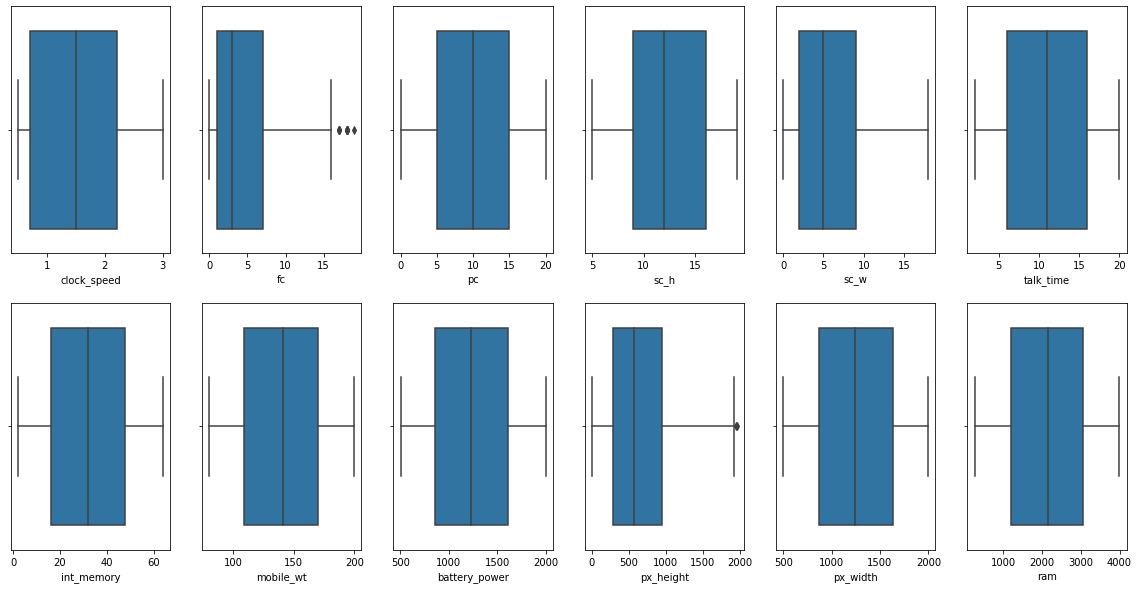

In [8]:
# Checking outliersusing box plot

list_1=['clock_speed','fc','pc','sc_h','sc_w','talk_time','int_memory','mobile_wt','battery_power','px_height','px_width','ram']
plt.figure(figsize=(20,10))
for index,item in enumerate(list_1):
  plt.subplot(2,6,index+1)
  sns.boxplot(df[item])

we dont have any outlier except in fc. we can negligible as they are near to maximum value.

In [9]:
# summary statstics of the training dataset

df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# EDA

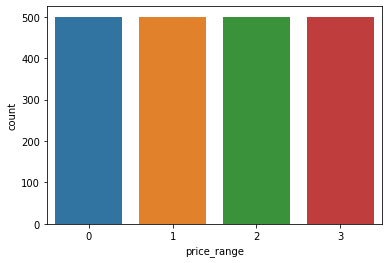

In [10]:
# ploting the countplot for price range
sns.countplot(df['price_range']);

In [11]:
# check the target variables first
price_range_val = df['price_range'].value_counts()
price_range_val

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

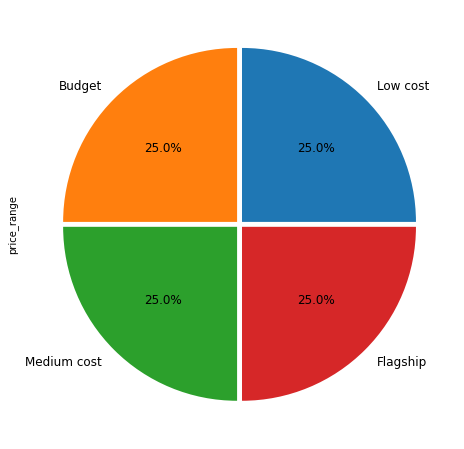

In [12]:
# visualizing the target variable
labels = ['Low cost', 'Budget', 'Medium cost', 'Flagship']
price_range_val.plot.pie(explode=[0.02]*4, labels=labels, autopct='%1.1f%%', figsize=(14,8), fontsize=12);

target variable is equally distributed. There is no data imbalance so we don't need over and under sampling.

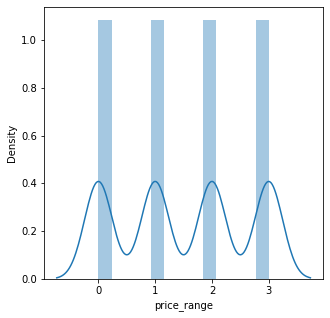

In [13]:
#target distribution
plt.figure(figsize=(5, 5))
sns.distplot(df['price_range']);

Correlation

In [14]:
# correlation matrix of all the attributes

df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


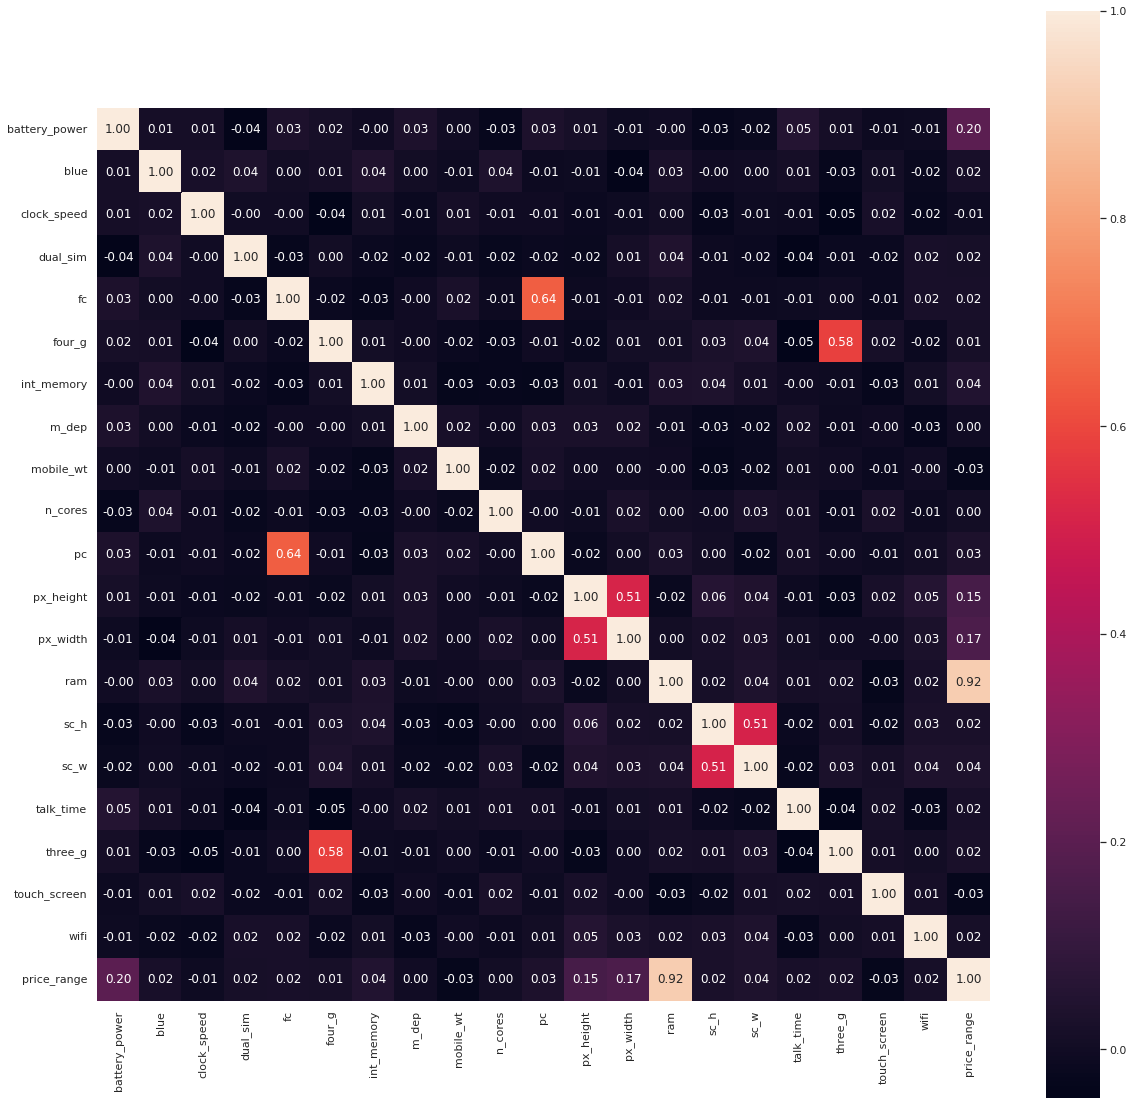

In [15]:
# visulaize the correlation matrix

corr = df.corr()
plt.figure(figsize = (20,20))
sns.set(font_scale = 1)
sns.heatmap(corr, cbar=True, square=True, annot=True, fmt='.2f')
plt.show()

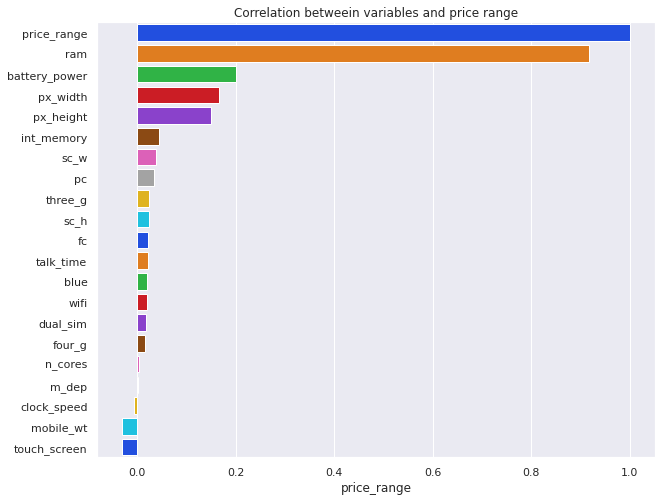

In [16]:
# correlation between features among themselves
corr = df.corr()
corr = corr.price_range
corr_price = corr.sort_values(ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x=corr_price, y=corr_price.index, palette='bright');
plt.title('Correlation betweein variables and price range');

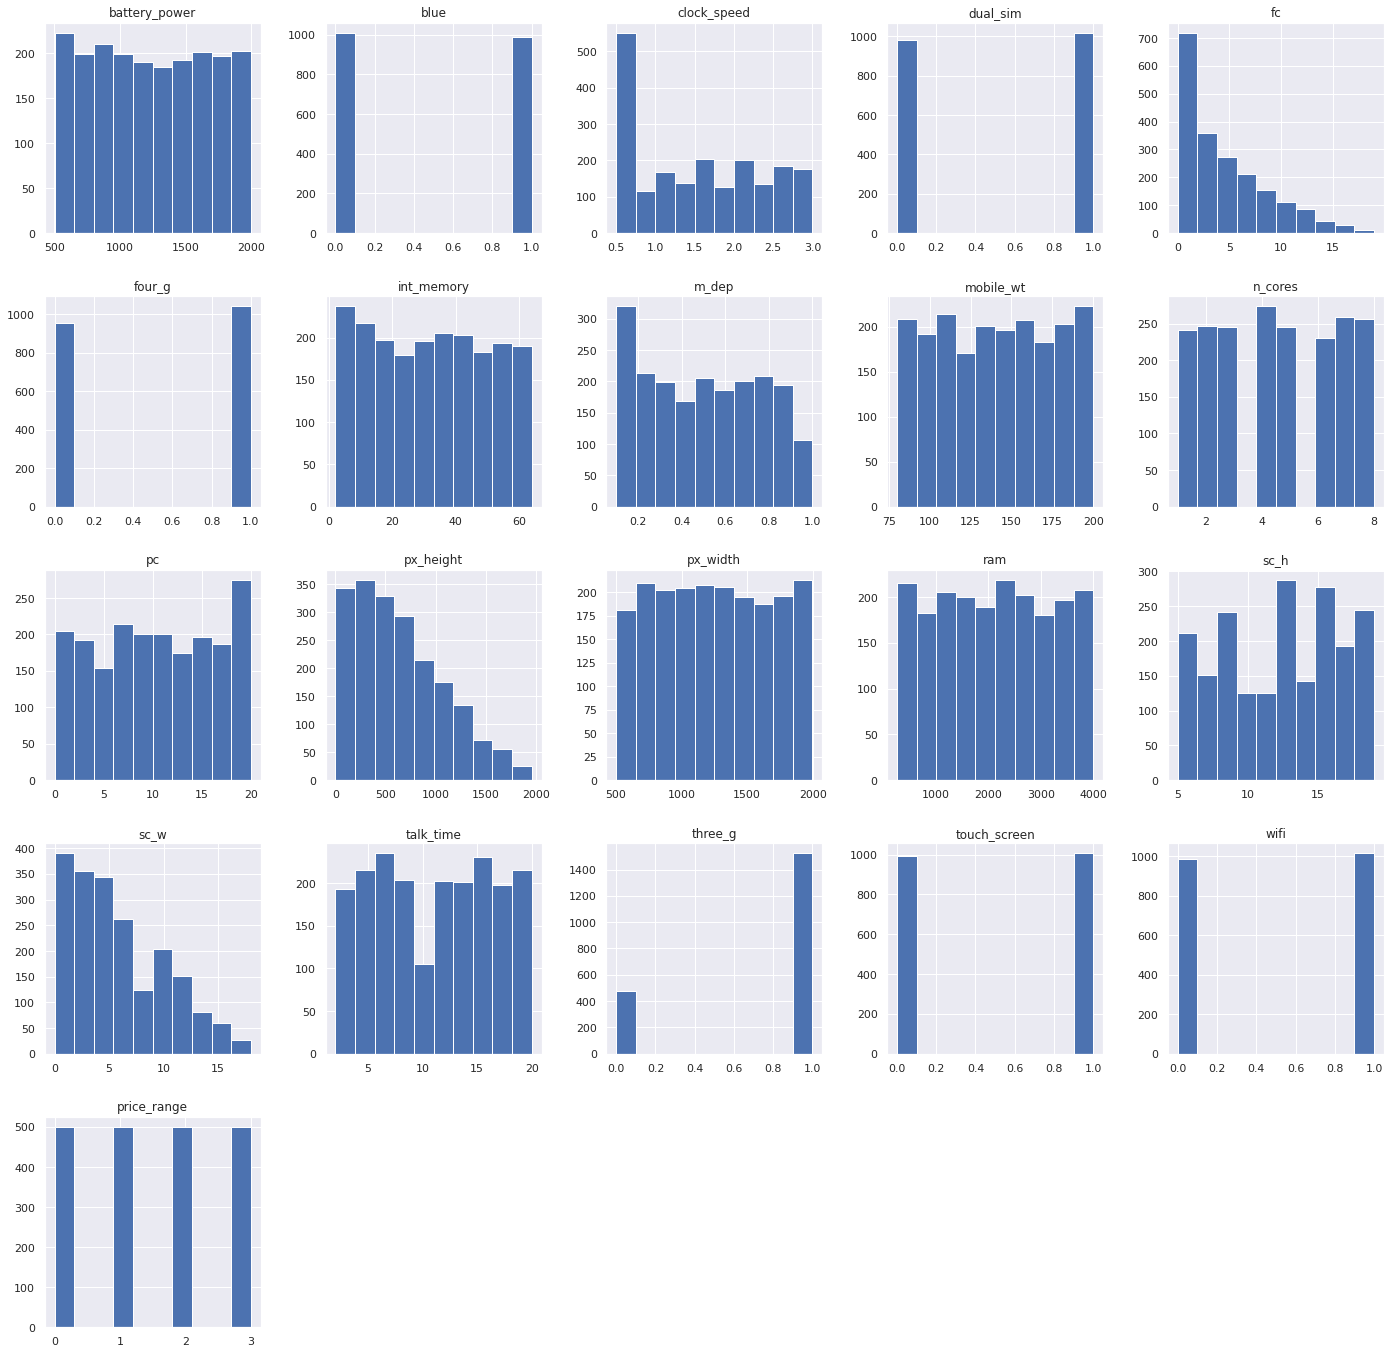

In [17]:
# data visualization for analysis of attribute
df.hist(sharex=False, sharey=False, figsize=(24,24))
plt.show()

# Splitting and Standardization

In [18]:
#splitting train and testing dastset
feature = df.drop(['price_range'], axis=1)
target = df['price_range']
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=0)

In [19]:
# feature scaling

scaler = StandardScaler()
col = df.iloc[:,:20].columns
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Creating code for the roc curve

In [20]:
# function for plotting roc curve
def plot_roc_auc(y_test, pred_pr):
  ''' it will take y_test and y predicted probability
  as input and plotting the roc curve'''

  featpr = {}  # frature probability
  targpr = {}  # target probability
  thresh = {}  # thresholds
  n_class = 4

  for i in range(n_class):
    featpr[i], targpr[i], thresh[i] = roc_curve(y_test, pred_pr[:,i], pos_label=i)

  #plotting
  plt.figure(figsize=(12,8))
  plt.plot(featpr[0], targpr[0], linestyle='dashed', color='blue', label=((f'Class 0(Low Cost) vs Rest, AUC={round(auc(featpr[0],targpr[0]),4)}')))
  plt.plot(featpr[1], targpr[1], linestyle='dashed', color='green', label=((f'Class 1(Budget) vs Rest, AUC={round(auc(featpr[1],targpr[1]),4)}')))
  plt.plot(featpr[2], targpr[2], linestyle='dashed', color='red', label=((f'Class 2(Medium Cost) vs Rest, AUC={round(auc(featpr[2],targpr[2]),4)}')))
  plt.plot(featpr[3], targpr[3], linestyle='dashed', color='black', label=((f'Class 3(Flagship) vs Rest, AUC={round(auc(featpr[3],targpr[3]),4)}')))
  plt.title('Multiclass ROC curve')
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.legend(loc='best')
  plt.savefig('Multiclass ROC', dpi=300);

#<B> Fitting Model

#Logistic Regression

In [21]:
# applying logistic regression
logre = LogisticRegression(multi_class='multinomial', solver='sag', max_iter=10000)
logre.fit(x_train, y_train)

# prediction
y_pred_logre = logre.predict(x_test)

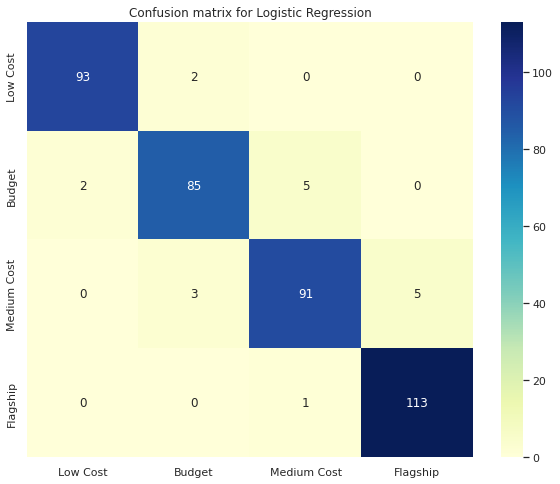

In [22]:
# Visualize the confusion matrix

confm = confusion_matrix(y_test, y_pred_logre)
columns = ['Low Cost', 'Budget', 'Medium Cost', 'Flagship']
conf_m = pd.DataFrame(data=confm, columns=columns, index=columns)

# Plot Heatmap

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_m, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion matrix for Logistic Regression')
plt.show()

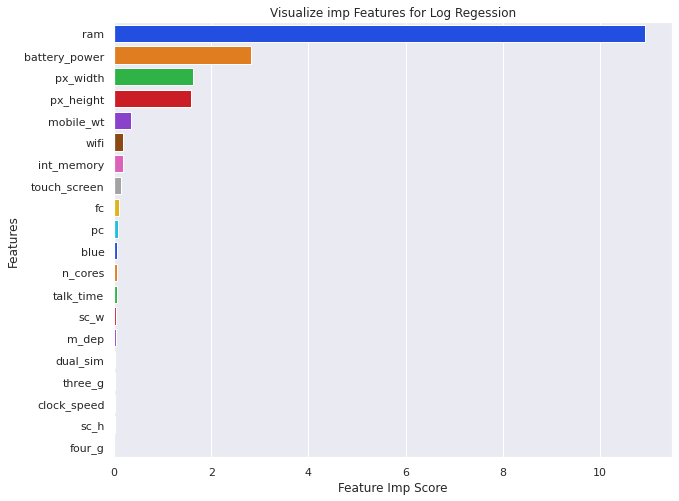

In [23]:
# Accuracy
acc_logre = accuracy_score(y_test, y_pred_logre)

# feature contribution

feature_imp = pd.Series(abs(logre.coef_[0]), index=col).sort_values(ascending=False)
plt.figure(figsize=(10,8)),
sns.barplot(x=feature_imp, y=feature_imp.index, palette='bright')
plt.xlabel('Feature Imp Score')
plt.ylabel('Features')
plt.title('Visualize imp Features for Log Regession')
plt.show()

# Decision Tree Classifier

In [24]:
# applying decision tree classifier

dtclass = DecisionTreeClassifier(random_state=0)
dtclass.fit(x_train, y_train)

# presiction
y_train_pred = dtclass.predict(x_train)
y_pred = dtclass.predict(x_test)

In [25]:
# accuracy score for train
accuracy_score(y_train, y_train_pred)

1.0

In [26]:
# accuracy score for test
acc_dtc = accuracy_score(y_test, y_pred)
acc_dtc

0.8275

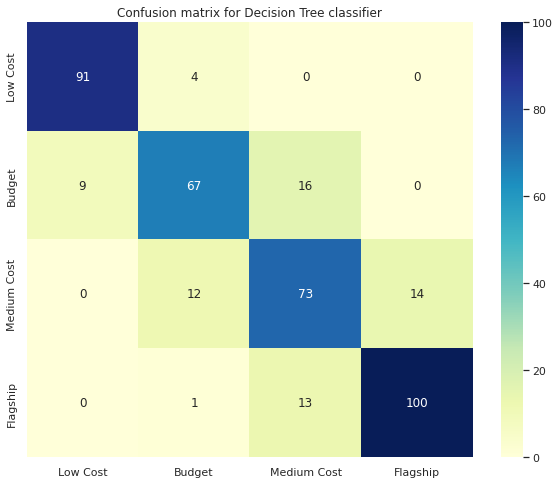

In [27]:
# Visualize the confusion matrix

conf_mat = confusion_matrix(y_test, y_pred)
conf_mdtc = pd.DataFrame(data=conf_mat, columns=columns, index=columns)

# Plot Heatmap

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mdtc, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion matrix for Decision Tree classifier')
plt.show()

In [28]:
# Classification report on train
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       1.00      1.00      1.00       408
           2       1.00      1.00      1.00       401
           3       1.00      1.00      1.00       386

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [29]:
# Classification report on test
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93        95
           1       0.80      0.73      0.76        92
           2       0.72      0.74      0.73        99
           3       0.88      0.88      0.88       114

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.82       400
weighted avg       0.83      0.83      0.83       400



Hyperparameters of Decision Tree Regression

In [30]:
# grid values for hyperparameter tunning

grid_value = {'criterion':['gini','entropy'], 'max_depth':[2,3,4,5,6,9,10,11,12,13,14,15],
              'splitter':['best','random'], 'min_samples_split':[3,5,10],
              'max_features':['auto', 'sqrt', 'log2', None]}

In [31]:
# applying GridSearchCV for model fitting
dtclass_tune = GridSearchCV(dtclass, param_grid=grid_value, cv=5, scoring='accuracy', verbose=3)
dtclass_tune.fit(x_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.438 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.431 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.487 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.419 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.475 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=0.475 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=0.481 total time=   0.0s
[CV 3/5] END criterion=gini, 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14,
                                       15],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_split': [3, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [32]:
# best parameters
dtclass_tune.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': None,
 'min_samples_split': 3,
 'splitter': 'best'}

In [33]:
# best estimstors
dtclass_tune.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=3,
                       random_state=0)

In [34]:
# fitting the model using best parameter

dtclass_opt = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=3, random_state=0)
dtclass_opt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=3,
                       random_state=0)

In [35]:
# prediction
y_train_pdtclass = dtclass_opt.predict(x_train)
y_pdtclass = dtclass_opt.predict(x_test)

In [36]:
# accuracy after hypertunning for train
accuracy_score(y_train, y_train_pdtclass)

0.921875

In [37]:
# accuracy after hypertunning for train
accht_dtc = accuracy_score(y_test, y_pdtclass)
accht_dtc

0.8575

In [38]:
# classification report on train set after hyperparameter tunning
print(classification_report(y_train, y_train_pdtclass))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       405
           1       0.90      0.88      0.89       408
           2       0.90      0.87      0.88       401
           3       0.95      0.96      0.95       386

    accuracy                           0.92      1600
   macro avg       0.92      0.92      0.92      1600
weighted avg       0.92      0.92      0.92      1600



In [39]:
# classification report on test set after hyperparameter tunning
print(classification_report(y_test, y_pdtclass))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        95
           1       0.76      0.84      0.80        92
           2       0.81      0.74      0.77        99
           3       0.92      0.92      0.92       114

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.85       400
weighted avg       0.86      0.86      0.86       400



In [40]:
# evaluation matrix

conf_matrix = confusion_matrix(y_test, y_pdtclass)
conf_matrix

array([[ 88,   7,   0,   0],
       [  7,  77,   8,   0],
       [  0,  17,  73,   9],
       [  0,   0,   9, 105]])

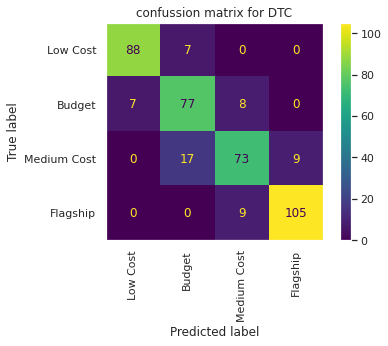

In [41]:
# plotting evaluation matrix

plot_confusion_matrix(dtclass_opt, x_test, y_test, display_labels=columns, xticks_rotation='vertical')
plt.grid(False)
plt.title('confussion matrix for DTC', fontsize=12)
plt.show()

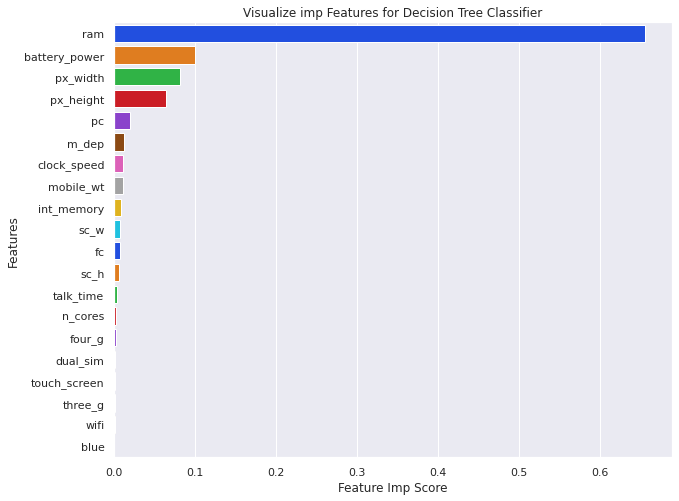

In [42]:
# feature contribution

feature_imp = pd.Series(abs(dtclass.feature_importances_), index=col).sort_values(ascending=False)
plt.figure(figsize=(10,8)),
sns.barplot(x=feature_imp, y=feature_imp.index, palette='bright')
plt.xlabel('Feature Imp Score')
plt.ylabel('Features')
plt.title('Visualize imp Features for Decision Tree Classifier')
plt.show()

# Random Forest Classifier

In [43]:
# creating object
rdfc = RandomForestClassifier(random_state=0)
rdfc.fit(x_train, y_train)

#prediction
y_train_predr = rdfc.predict(x_train)
y_predr = rdfc.predict(x_test)

In [44]:
# accuracy score for training
accuracy_score(y_train, y_train_predr)

1.0

In [45]:
# accuracy score for testing
acc_rfc = accuracy_score(y_test, y_predr)
acc_rfc

0.8575

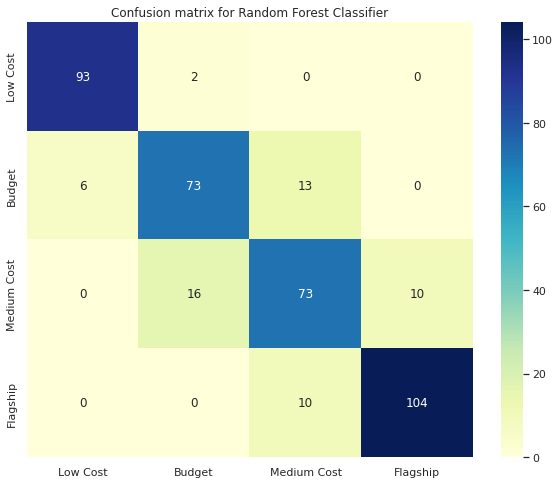

In [46]:
# Visualize the confusion matrix

conf_mr = confusion_matrix(y_test, y_predr)
conf_mrdf = pd.DataFrame(data=conf_mr, columns=columns, index=columns)

# Plot Heatmap

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mrdf, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion matrix for Random Forest Classifier')
plt.show()

In [47]:
#classification reort on training
print(classification_report(y_train, y_train_predr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       1.00      1.00      1.00       408
           2       1.00      1.00      1.00       401
           3       1.00      1.00      1.00       386

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [48]:
#classification reort on test
print(classification_report(y_test, y_predr))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        95
           1       0.80      0.79      0.80        92
           2       0.76      0.74      0.75        99
           3       0.91      0.91      0.91       114

    accuracy                           0.86       400
   macro avg       0.85      0.86      0.85       400
weighted avg       0.86      0.86      0.86       400



Hyperparameter Tunning

In [49]:
# parameter values for hyperparameter tunning
grid_values = {'criterion':['gini', 'entropy'], 'n_estimators':[300, 400, 500, 700], 'max_depth':[None, 10, 20, 40],
               'min_samples_split':[2, 6, 10], 'max_leaf_nodes':[None],'max_features':['auto', 'log2', 'sqrt']}

In [50]:
# applying GridSearchCV and fitting the model.
rdfc_tune = GridSearchCV(rdfc, param_grid=grid_values, cv=3, verbose=3, scoring='accuracy')
rdfc_tune.fit(x_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV 1/3] END criterion=gini, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.867 total time=   2.0s
[CV 2/3] END criterion=gini, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.872 total time=   1.7s
[CV 3/3] END criterion=gini, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.857 total time=   0.9s
[CV 1/3] END criterion=gini, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.863 total time=   2.5s
[CV 2/3] END criterion=gini, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.872 total time=   2.2s
[CV 3/3] END criterion=gini, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.865 total time=   3.3s
[

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 40],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'max_leaf_nodes': [None],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [300, 400, 500, 700]},
             scoring='accuracy', verbose=3)

In [51]:
# best parameter
rdfc_tune.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_split': 2,
 'n_estimators': 500}

In [52]:
# fitting best parameters to model
rdfc_opt = RandomForestClassifier(max_features='auto', criterion='entropy', max_depth=None, max_leaf_nodes=None, min_samples_split=2, n_estimators=500, random_state=0)
rdfc_opt.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=0)

In [53]:
# predict
y_train_prdfc = rdfc_opt.predict(x_train)
y_prdfc = rdfc_opt.predict(x_test)

In [54]:
# accuracy score for training after fitting the model with best param
accuracy_score(y_train, y_train_prdfc)

1.0

In [55]:
# accuracy score for test after fitting the model with best param
accht_rdfc = accuracy_score(y_test, y_prdfc)
accht_rdfc

0.8625

In [57]:
# classification report on train set after hyperparameter tunning
print(classification_report(y_train, y_train_prdfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       1.00      1.00      1.00       408
           2       1.00      1.00      1.00       401
           3       1.00      1.00      1.00       386

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [58]:
# classification report on test set after hyperparameter tunning
print(classification_report(y_test, y_prdfc))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96        95
           1       0.79      0.79      0.79        92
           2       0.77      0.74      0.75        99
           3       0.93      0.92      0.93       114

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



In [60]:
# evaluation matrix
conf_matrix = confusion_matrix(y_test, y_prdfc)
conf_matrix

array([[ 94,   1,   0,   0],
       [  6,  73,  13,   0],
       [  0,  18,  73,   8],
       [  0,   0,   9, 105]])

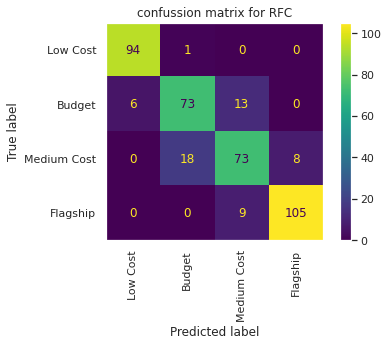

In [61]:
# plotting evaluation matrix

plot_confusion_matrix(rdfc_opt, x_test, y_test, display_labels=columns, xticks_rotation='vertical')
plt.grid(False)
plt.title('confussion matrix for RFC', fontsize=12)
plt.show()

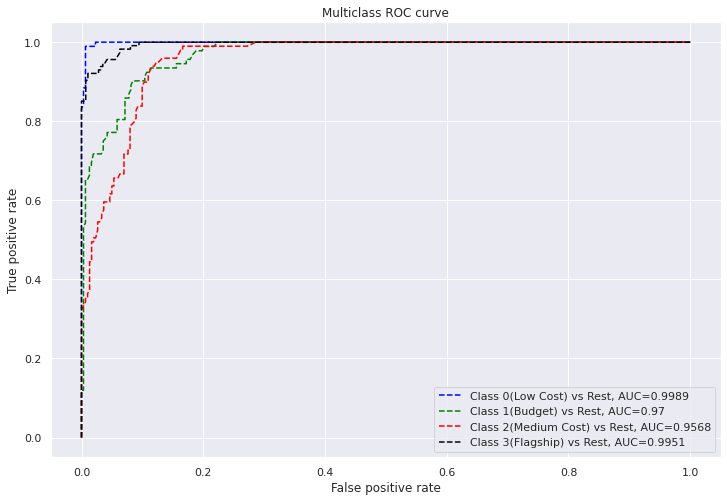

In [62]:
# plotting roc curve for random forest model

pred_prob = rdfc_opt.predict_proba(x_test)
plot_roc_auc(y_test, pred_prob)

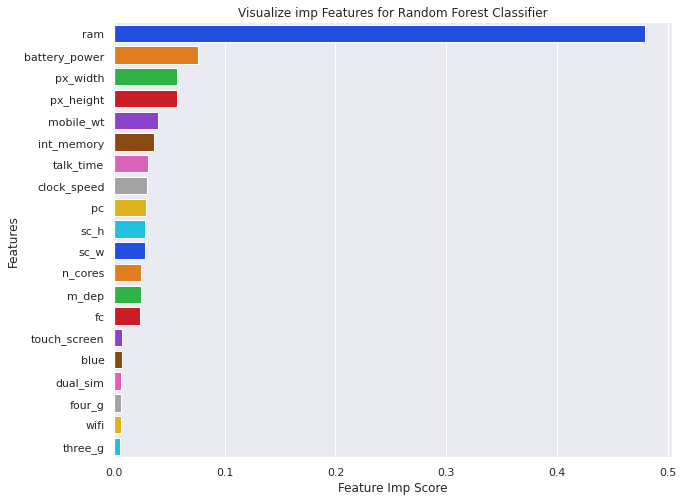

In [63]:
# feature contribution

feature_imp = pd.Series(abs(rdfc.feature_importances_), index=col).sort_values(ascending=False)
plt.figure(figsize=(10,8)),
sns.barplot(x=feature_imp, y=feature_imp.index, palette='bright')
plt.xlabel('Feature Imp Score')
plt.ylabel('Features')
plt.title('Visualize imp Features for Random Forest Classifier')
plt.show()

# SVM

In [64]:
# creating objects fpr SVM

svm = SVC(kernel='linear', random_state=0)
svm.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [65]:
#predict
y_train_p = svm.predict(x_train)
y_pre = svm.predict(x_test)

In [66]:
# accuracy score for training
accuracy_score(y_train, y_train_p)

0.980625

In [67]:
#accuracy score for test
acc_svm = accuracy_score(y_test, y_pre)
acc_svm

0.9525

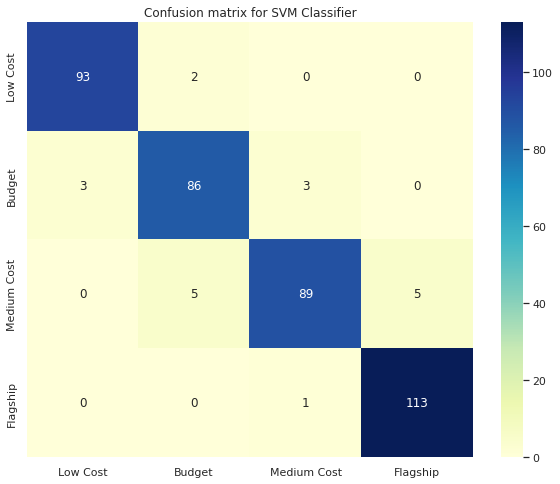

In [68]:
# Visualize the confusion matrix

conf_ms = confusion_matrix(y_test, y_pre)
conf_msvm = pd.DataFrame(data=conf_ms, columns=columns, index=columns)

# Plot Heatmap

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_msvm, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion matrix for SVM Classifier')
plt.show()

In [69]:
# classification report on train
print(classification_report(y_train, y_train_p))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       405
           1       0.97      0.98      0.97       408
           2       0.98      0.97      0.98       401
           3       0.99      0.99      0.99       386

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600



In [70]:
#classification report on test
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        95
           1       0.92      0.93      0.93        92
           2       0.96      0.90      0.93        99
           3       0.96      0.99      0.97       114

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



Hyperparameter Tunning

In [71]:
# parameter values for hyperparameter tunning
grid_values = {'C':[0.01, 0.1, 1, 10], 'kernel':['linear', 'ploy', 'rbf', 'sigmoid'], 'degree':[1, 3, 5, 7], 'gamma':[0.01, 1]}

In [72]:
# applying GridSearchCV and fitting model
svm_ht = GridSearchCV(svm, grid_values, cv=5, verbose=2)
svm_ht.fit(x_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=ploy; total time=   0.0s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=ploy; total time=   0.0s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=ploy; total time=   0.0s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=ploy; total time=   0.0s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=ploy; total time=   0.0s
[CV] END ...........C=0.01, degree=1, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ...........C=0.01, degree=1, gamma=0.

GridSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=0),
             param_grid={'C': [0.01, 0.1, 1, 10], 'degree': [1, 3, 5, 7],
                         'gamma': [0.01, 1],
                         'kernel': ['linear', 'ploy', 'rbf', 'sigmoid']},
             verbose=2)

In [73]:
# best parameter
svm_ht.best_params_

{'C': 10, 'degree': 1, 'gamma': 0.01, 'kernel': 'linear'}

In [74]:
# best estimator
svm_ht.best_estimator_

SVC(C=10, degree=1, gamma=0.01, kernel='linear', random_state=0)

In [75]:
# model fitting using best parameter

svm_opt = SVC(C=10, degree=1, gamma=0.01, kernel='linear', probability=True)
svm_opt.fit(x_train, y_train)

SVC(C=10, degree=1, gamma=0.01, kernel='linear', probability=True)

In [76]:
#predict
y_train_psvm = svm_opt.predict(x_train)
y_psvm = svm_opt.predict(x_test)

In [77]:
# accuracy score for train after model fitting with best param
accuracy_score(y_train, y_train_psvm)

0.985

In [78]:
# accuracy score for test after model fitting with best param
accht_svm = accuracy_score(y_test, y_psvm)
accht_svm

0.95

In [79]:
# classification report of train set after hyperparameter tunning
print(classification_report(y_train, y_train_psvm))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       405
           1       0.98      0.98      0.98       408
           2       0.98      0.98      0.98       401
           3       0.99      0.99      0.99       386

    accuracy                           0.98      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.98      0.99      1600



In [80]:
# classification report of test set after hyperparameter tunning
print(classification_report(y_test, y_psvm))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        95
           1       0.92      0.92      0.92        92
           2       0.93      0.92      0.92        99
           3       0.97      0.98      0.97       114

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



In [81]:
# evaluation matrix

conf_matrix = confusion_matrix(y_test, y_psvm)
conf_matrix

array([[ 92,   3,   0,   0],
       [  2,  85,   5,   0],
       [  0,   4,  91,   4],
       [  0,   0,   2, 112]])

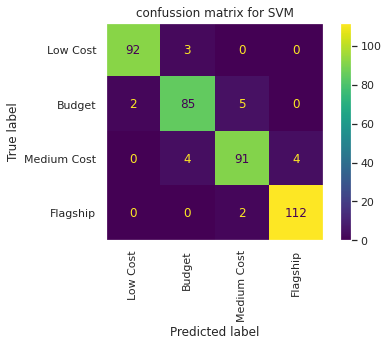

In [82]:
# plotting evaluation matrix

plot_confusion_matrix(svm_opt, x_test, y_test, display_labels=columns, xticks_rotation='vertical')
plt.grid(False)
plt.title('confussion matrix for SVM', fontsize=12)
plt.show()

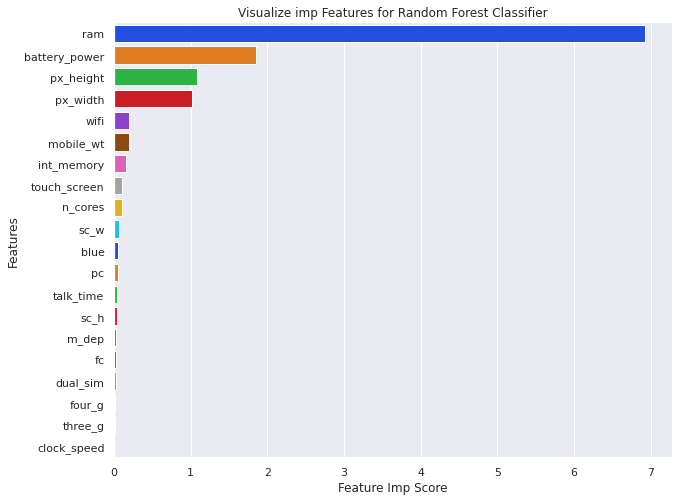

In [83]:
# feature contribution

feature_imp = pd.Series(abs(svm.coef_[0]), index=col).sort_values(ascending=False)
plt.figure(figsize=(10,8)),
sns.barplot(x=feature_imp, y=feature_imp.index, palette='bright')
plt.xlabel('Feature Imp Score')
plt.ylabel('Features')
plt.title('Visualize imp Features for Random Forest Classifier')
plt.show()

# Gradient Boosting Classifier

In [84]:
# crating objects for gradient boostin classifier
grbc = GradientBoostingClassifier(random_state=0)
grbc.fit(x_train, y_train)

GradientBoostingClassifier(random_state=0)

In [85]:
y_train_pr = grbc.predict(x_train)
y_prd = grbc.predict(x_test)

In [86]:
# accuracy score for training
accuracy_score(y_train, y_train_pr)

0.998125

In [87]:
# accuracy score for test
acc_gbc = accuracy_score(y_test, y_prd)
acc_gbc

0.9125

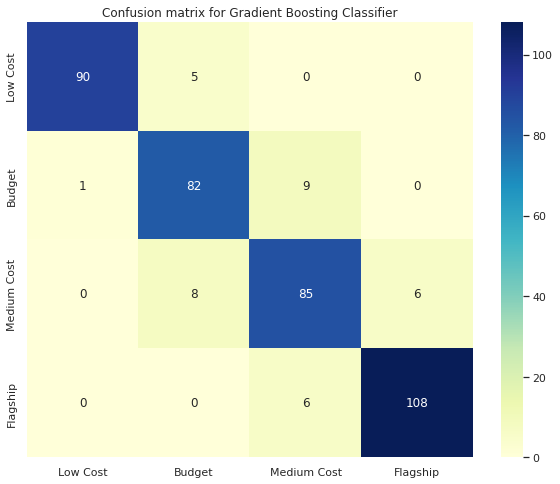

In [88]:
# Visualize the confusion matrix

conf_mgb = confusion_matrix(y_test, y_prd)
conf_mgrb = pd.DataFrame(data=conf_mgb, columns=columns, index=columns)

# Plot Heatmap

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mgrb, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion matrix for Gradient Boosting Classifier')
plt.show()

In [89]:
# classification report on training
print(classification_report(y_train, y_train_pr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       1.00      1.00      1.00       408
           2       1.00      1.00      1.00       401
           3       1.00      1.00      1.00       386

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [90]:
# classificstion report on test
print(classification_report(y_test, y_prd))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        95
           1       0.86      0.89      0.88        92
           2       0.85      0.86      0.85        99
           3       0.95      0.95      0.95       114

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



Hyperparameter Tunning

In [91]:
# parameter values for hyperparmeter tunning
grid_value = {'learning_rate':[0.005, 1, 2, 3], 'min_samples_split':range(10,26)}

In [92]:
# applying GridSearchCV and fitting model
grbc_tune = GridSearchCV(grbc, param_grid = grid_value, cv=3, scoring='accuracy', verbose=1)
grbc_tune.fit(x_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.005, 1, 2, 3],
                         'min_samples_split': range(10, 26)},
             scoring='accuracy', verbose=1)

In [93]:
# best parameter
grbc_tune.best_params_

{'learning_rate': 1, 'min_samples_split': 11}

In [94]:
# best estimator
grbc_tune.best_estimator_

GradientBoostingClassifier(learning_rate=1, min_samples_split=11,
                           random_state=0)

In [95]:
# fittingg the model using best parameter
grbc_opt = GradientBoostingClassifier(learning_rate=1, min_samples_split=11, random_state=0)
grbc_opt.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=1, min_samples_split=11,
                           random_state=0)

In [96]:
# predict
y_train_pgrbc = grbc_opt.predict(x_train)
y_pgrbc = grbc_opt.predict(x_test)

In [97]:
# accuracy score for train after model fitting with best param
accuracy_score(y_train, y_train_pgrbc)

0.999375

In [98]:
# accuracy score for test after model fitting with best param
accht_gbc = accuracy_score(y_test, y_pgrbc)
accht_gbc

0.9175

In [99]:
# classification report of train set after hyperparameter tunning
print(classification_report(y_train, y_train_pgrbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       1.00      1.00      1.00       408
           2       1.00      1.00      1.00       401
           3       1.00      1.00      1.00       386

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [100]:
# classification report of test set after hyperparameter tunning
print(classification_report(y_test, y_pgrbc))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        95
           1       0.90      0.87      0.88        92
           2       0.86      0.87      0.86        99
           3       0.94      0.96      0.95       114

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



In [101]:
# evaluation matrix

conf_matrix = confusion_matrix(y_test, y_pgrbc)
conf_matrix

array([[ 92,   3,   0,   0],
       [  3,  80,   9,   0],
       [  0,   6,  86,   7],
       [  0,   0,   5, 109]])

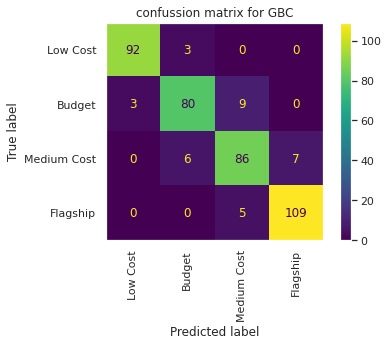

In [102]:
# plotting evaluation matrix

plot_confusion_matrix(grbc_opt, x_test, y_test, display_labels=columns, xticks_rotation='vertical')
plt.grid(False)
plt.title('confussion matrix for GBC', fontsize=12)
plt.show()

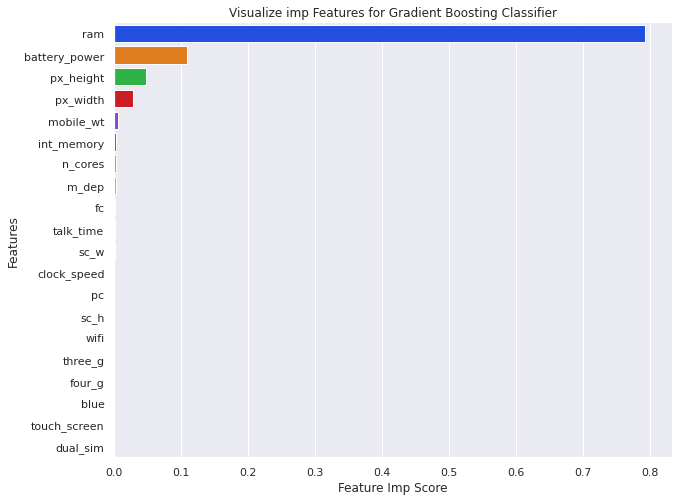

In [103]:
# feature contribution

feature_imp = pd.Series(abs(grbc.feature_importances_), index=col).sort_values(ascending=False)
plt.figure(figsize=(10,8)),
sns.barplot(x=feature_imp, y=feature_imp.index, palette='bright')
plt.xlabel('Feature Imp Score')
plt.ylabel('Features')
plt.title('Visualize imp Features for Gradient Boosting Classifier')
plt.show()

# K Nearest Neighbors

In [105]:
# creating objects for KNN

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [106]:
# predit
y_train_pd = knn.predict(x_train)
y_pd = knn.predict(x_test)

In [107]:
# accuracy score training
accuracy_score(y_train, y_train_pd)

0.695

In [109]:
#accuracy score test
acc_knn = accuracy_score(y_test, y_pd)
acc_knn

0.515

Max Accuracy: 0.6375 at K= 17


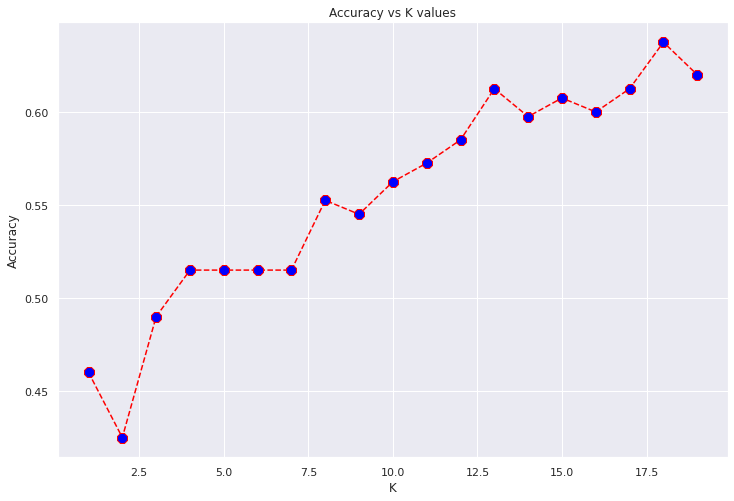

In [110]:
accuracy = []
from sklearn import metrics

for i in range(1,20):
  knn = KNeighborsClassifier(n_neighbors=i).fit(x_train, y_train)
  knn_predict = knn.predict(x_test)
  accuracy.append(metrics.accuracy_score(y_test, knn_predict))

plt.figure(figsize = (12,8))
plt.plot(range(1,20), accuracy, color='red', linestyle='dashed', marker='8', markerfacecolor='blue', markersize=10)
plt.title('Accuracy vs K values')
plt.xlabel('K')
plt.ylabel('Accuracy')
print('Max Accuracy:', max(accuracy), 'at K=', accuracy.index(max(accuracy)))

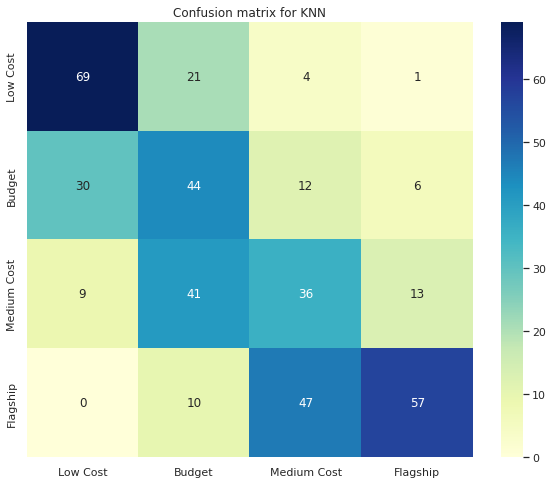

In [111]:
# Visualize the confusion matrix

conf_mk = confusion_matrix(y_test, y_pd)
conf_mknn = pd.DataFrame(data=conf_mk, columns=columns, index=columns)

# Plot Heatmap

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mknn, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion matrix for KNN')
plt.show()

In [112]:
# classification report on training
print(classification_report(y_train, y_train_pd))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79       405
           1       0.58      0.64      0.61       408
           2       0.62      0.61      0.61       401
           3       0.89      0.68      0.78       386

    accuracy                           0.69      1600
   macro avg       0.71      0.69      0.70      1600
weighted avg       0.71      0.69      0.70      1600



In [113]:
# classification report on test
print(classification_report(y_test, y_pd))

              precision    recall  f1-score   support

           0       0.64      0.73      0.68        95
           1       0.38      0.48      0.42        92
           2       0.36      0.36      0.36        99
           3       0.74      0.50      0.60       114

    accuracy                           0.52       400
   macro avg       0.53      0.52      0.52       400
weighted avg       0.54      0.52      0.52       400



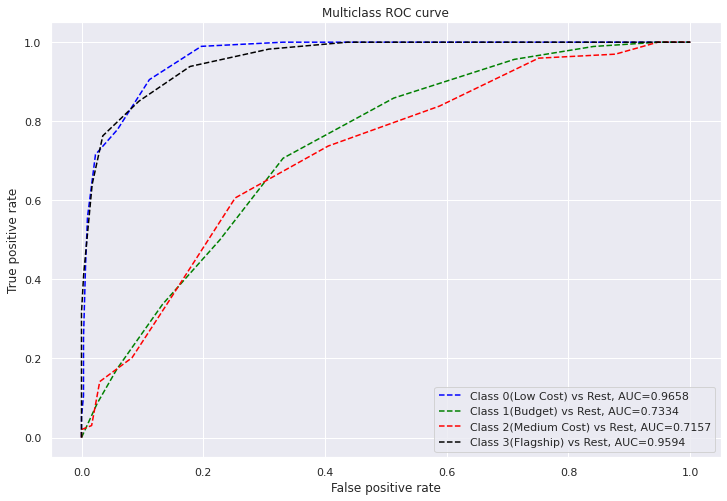

In [114]:
# plotting roc curve
pred_prob = knn.predict_proba(x_test)
plot_roc_auc(y_test, pred_prob)

In [115]:
# parameter values for hyperparameter tunning
grid_values = {'n_neighbors': list(range(1,30))}

In [116]:
# applying GridSearchCV and fitting model
knn_ht = GridSearchCV(knn, param_grid=grid_values, cv=5, scoring='accuracy', verbose=3)
knn_ht.fit(x_train, y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.447 total time=   0.0s
[CV 2/5] END .....................n_neighbors=1;, score=0.475 total time=   0.0s
[CV 3/5] END .....................n_neighbors=1;, score=0.469 total time=   0.0s
[CV 4/5] END .....................n_neighbors=1;, score=0.412 total time=   0.0s
[CV 5/5] END .....................n_neighbors=1;, score=0.425 total time=   0.0s
[CV 1/5] END .....................n_neighbors=2;, score=0.459 total time=   0.0s
[CV 2/5] END .....................n_neighbors=2;, score=0.431 total time=   0.0s
[CV 3/5] END .....................n_neighbors=2;, score=0.406 total time=   0.0s
[CV 4/5] END .....................n_neighbors=2;, score=0.388 total time=   0.0s
[CV 5/5] END .....................n_neighbors=2;, score=0.441 total time=   0.0s
[CV 1/5] END .....................n_neighbors=3;, score=0.475 total time=   0.0s
[CV 2/5] END .....................n_neighbors=3

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=19),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             scoring='accuracy', verbose=3)

In [117]:
# best parameter
knn_ht.best_params_

{'n_neighbors': 29}

In [118]:
# fitting model using best parameter
knn_opt = KNeighborsClassifier(n_neighbors=29)
knn_opt.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=29)

In [119]:
# predict
y_train_pknn = knn_opt.predict(x_train)
y_pknn = knn_opt.predict(x_test)

In [ ]:
# accuracy score for train after model fitting with best param
accuracy_score(y_train, y_train_pknn)

In [121]:
# accuracy score for test after model fitting with best param
accht_knn = accuracy_score(y_test, y_pknn)
accht_knn

0.6175

In [122]:
# classification report of train set after hyperparameter tunning
print(classification_report(y_train, y_train_pknn))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79       405
           1       0.57      0.58      0.58       408
           2       0.59      0.64      0.61       401
           3       0.85      0.69      0.76       386

    accuracy                           0.68      1600
   macro avg       0.69      0.68      0.68      1600
weighted avg       0.69      0.68      0.68      1600



In [123]:
# classification report of test set after hyperparameter tunning
print(classification_report(y_test, y_pknn))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76        95
           1       0.46      0.54      0.50        92
           2       0.46      0.54      0.50        99
           3       0.86      0.64      0.73       114

    accuracy                           0.62       400
   macro avg       0.64      0.62      0.62       400
weighted avg       0.65      0.62      0.63       400



In [124]:
# evaluation matrix
conf_matrix = confusion_matrix(y_test, y_pknn)
conf_matrix

array([[71, 20,  4,  0],
       [20, 50, 21,  1],
       [ 1, 34, 53, 11],
       [ 0,  4, 37, 73]])

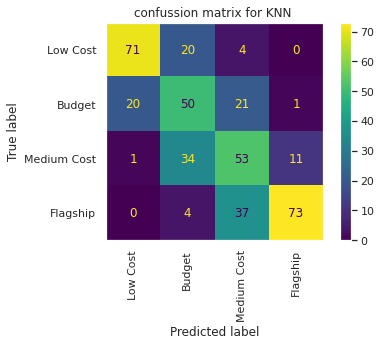

In [125]:
# plotting evaluation matrix
plot_confusion_matrix(knn_opt, x_test, y_test, display_labels=columns, xticks_rotation='vertical')
plt.grid(False)
plt.title('confussion matrix for KNN ', fontsize=12)
plt.show()

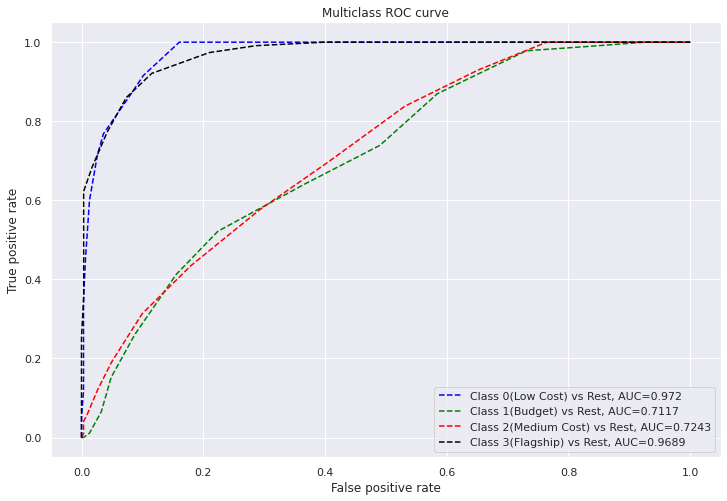

In [126]:
# plotting roc curve after hyperparameter tunning

pred_prob = knn_opt.predict_proba(x_test)
plot_roc_auc(y_test, pred_prob)

# XGBoost Classifier

In [127]:
# creating object for XGB

xgbc = XGBClassifier()
xgbc.fit(x_train, y_train)

XGBClassifier(objective='multi:softprob')

In [128]:
# predict
y_train_pdx = xgbc.predict(x_train)
y_pdx = xgbc.predict(x_test)

In [129]:
# accuray score for training
accuracy_score(y_train, y_train_pdx)

0.9875

In [130]:
# accuracy score on test
acc_xgb = accuracy_score(y_test, y_pdx)
acc_xgb

0.9125

In [131]:
# classification report on training
print(classification_report(y_train, y_train_pdx))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       405
           1       0.98      0.98      0.98       408
           2       0.98      0.98      0.98       401
           3       1.00      0.99      1.00       386

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



In [132]:
# classification report on testing
print(classification_report(y_test, y_pdx))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        95
           1       0.88      0.85      0.86        92
           2       0.86      0.87      0.86        99
           3       0.96      0.96      0.96       114

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



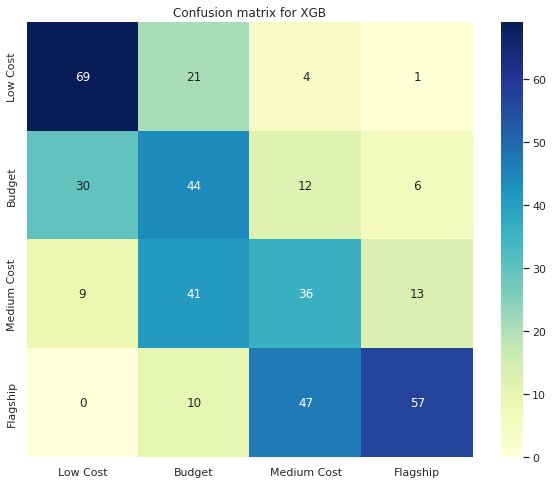

In [133]:
# Visualize the confusion matrix

conf_mx = confusion_matrix(y_test, y_pd)
conf_mxgb = pd.DataFrame(data=conf_mx, columns=columns, index=columns)

# Plot Heatmap

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mxgb, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion matrix for XGB')
plt.show()

Hyperparameter Tunning

In [134]:
# parameter values for hyperparapmeter tunning
grid_value = {'learning_rate':[0.6,1], 'n_estimators':[500, 1000], 'gamma':[0.2], 'subsample':[0.5, 0.6]}

In [135]:
# applying GridSearchCV and fitting model
xgbc_ht = GridSearchCV(xgbc, param_grid=grid_value, cv=3, verbose=4)
xgbc_ht.fit(x_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.5;, score=0.891 total time=   2.0s
[CV 2/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.5;, score=0.880 total time=   2.0s
[CV 3/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.5;, score=0.895 total time=   2.0s
[CV 1/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.6;, score=0.897 total time=   2.0s
[CV 2/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.6;, score=0.887 total time=   2.1s
[CV 3/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.6;, score=0.904 total time=   2.1s
[CV 1/3] END gamma=0.2, learning_rate=0.6, n_estimators=1000, subsample=0.5;, score=0.888 total time=   3.9s
[CV 2/3] END gamma=0.2, learning_rate=0.6, n_estimators=1000, subsample=0.5;, score=0.878 total time=   3.9s
[CV 3/3] END gamma=0.2, learning_rate=0.6, n_estimators=1000, subsample=0.

GridSearchCV(cv=3, estimator=XGBClassifier(objective='multi:softprob'),
             param_grid={'gamma': [0.2], 'learning_rate': [0.6, 1],
                         'n_estimators': [500, 1000], 'subsample': [0.5, 0.6]},
             verbose=4)

In [136]:
# best parameter
xgbc_ht.best_params_

{'gamma': 0.2, 'learning_rate': 0.6, 'n_estimators': 1000, 'subsample': 0.6}

In [137]:
# fitting model usinf best parameter
xgbc_opt = XGBClassifier(learning_rate=0.6, gamma=0.2, n_estimators=1000, subsample=0.6)
xgbc_opt.fit(x_train, y_train)

XGBClassifier(gamma=0.2, learning_rate=0.6, n_estimators=1000,
              objective='multi:softprob', subsample=0.6)

In [138]:
# predict
y_train_pxgbc = xgbc_opt.predict(x_train)
y_pxgbc = xgbc_opt.predict(x_test)

In [139]:
# accuracy score for train after model fitting with best param
accuracy_score(y_train, y_train_pxgbc)

1.0

In [140]:
# accuracy score for test after model fitting with best param
accht_xgb = accuracy_score(y_test, y_pxgbc)
accht_xgb

0.9325

In [141]:
# classification report of train set after hyperparameter tunning
print(classification_report(y_train, y_train_pxgbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       1.00      1.00      1.00       408
           2       1.00      1.00      1.00       401
           3       1.00      1.00      1.00       386

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [142]:
# classification report of test set after hyperparameter tunning
print(classification_report(y_test, y_pxgbc))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        95
           1       0.91      0.92      0.92        92
           2       0.89      0.88      0.88        99
           3       0.95      0.95      0.95       114

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



In [143]:
# evaluation matrix
conf_matrix = confusion_matrix(y_test, y_pxgbc)
conf_matrix

array([[ 93,   2,   0,   0],
       [  2,  85,   5,   0],
       [  0,   6,  87,   6],
       [  0,   0,   6, 108]])

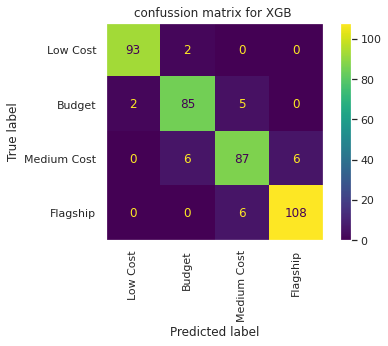

In [144]:
# plotting evaluation matrix

plot_confusion_matrix(xgbc_opt, x_test, y_test, display_labels=columns, xticks_rotation='vertical')
plt.grid(False)
plt.title('confussion matrix for XGB ', fontsize=12)
plt.show()

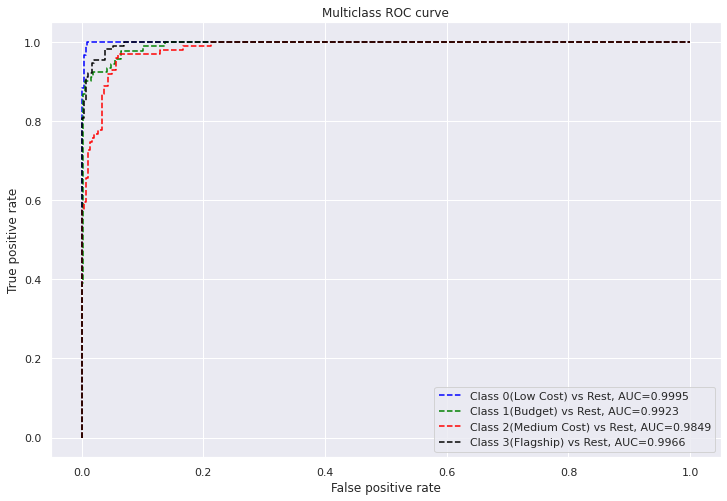

In [145]:
# plotting roc curve
pred_prob = xgbc_opt.predict_proba(x_test)
plot_roc_auc(y_test, pred_prob)

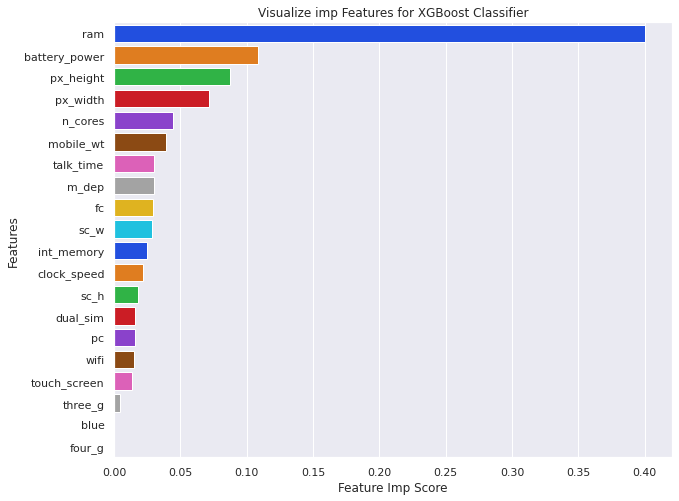

In [146]:
# feature contribution

feature_imp = pd.Series(abs(xgbc.feature_importances_), index=col).sort_values(ascending=False)
plt.figure(figsize=(10,8)),
sns.barplot(x=feature_imp, y=feature_imp.index, palette='bright')
plt.xlabel('Feature Imp Score')
plt.ylabel('Features')
plt.title('Visualize imp Features for XGBoost Classifier')
plt.show()

# Model Explainability

In [147]:
# ccomparing the models on their accuracy

models = ['LR', 'DTC', 'RFC', 'SVM', 'GBC', 'KNN', 'XGB']
acc_score = [acc_logre, acc_dtc, acc_rfc, acc_svm, acc_gbc, acc_knn, acc_xgb]
print('Model\tAccuracy\n')

for i in range(7):
  print(str(models[i]) + '\t' + str(acc_score[i]), end='\n')

Model	Accuracy

LR	0.955
DTC	0.8275
RFC	0.8575
SVM	0.9525
GBC	0.9125
KNN	0.515
XGB	0.9125


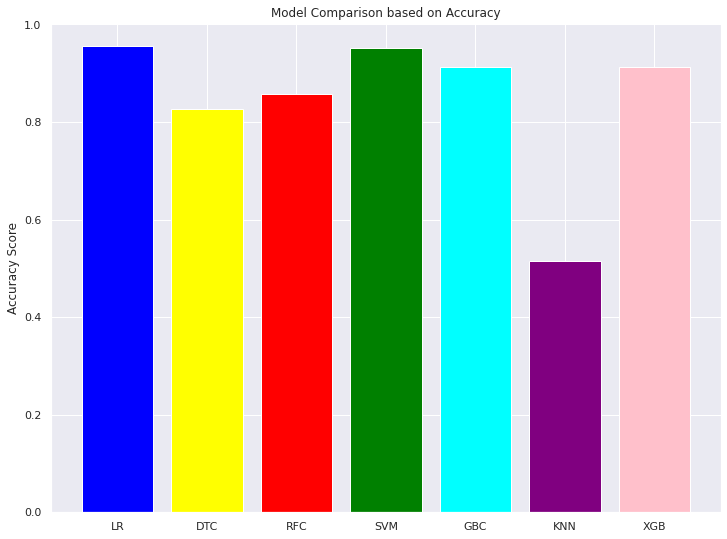

In [148]:
# visualize the model accuracy

plt.rcParams['figure.figsize'] = (12,9)
plt.bar(models, acc_score, color=['blue', 'yellow', 'red', 'green', 'cyan', 'purple', 'pink'])
plt.ylabel('Accuracy Score')
plt.title('Model Comparison based on Accuracy')
plt.show()

after fitting the best parameters (hyperparameter tunning)

In [149]:
# comaparing the model accuracy after hypertunning and fitting with best parameter

models_ht= ['DTC', 'RFC', 'SVM', 'GBC', 'KNN', 'XGB']
accht_score = [accht_dtc, accht_rdfc, accht_svm, accht_gbc, accht_knn, accht_xgb]
print('Model_ht\tAccuracy\n')

for i in range(6):
  print(str(models_ht[i]) + '\t' + str(accht_score[i]), end='\n')

Model_ht	Accuracy

DTC	0.8575
RFC	0.8625
SVM	0.95
GBC	0.9175
KNN	0.6175
XGB	0.9325


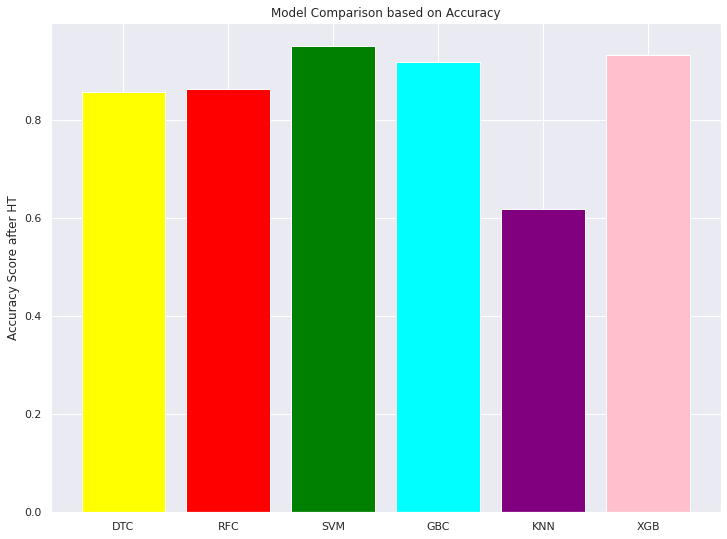

In [150]:
# visualize the models accuracy after fitting the best params
plt.rcParams['figure.figsize'] = (12,9)
plt.bar(models_ht, accht_score, color=['yellow', 'red', 'green', 'cyan', 'purple', 'pink'])
plt.ylabel('Accuracy Score after HT')
plt.title('Model Comparison based on Accuracy')
plt.show()

# Conclusion

The best accuracy for best model is 0.98 and 0.95 for train and test set respectively

SVM model is performing very well as compared to other alogorithms

The imporatant features are 'RAM', 'Battery power', 'px_height' and 'px_weight' in determine the prediction.

Performance can be improved by applying fine tunning